# **Data Science Intern @LGM Virtual Internship 2023**
# **Task 1 Iris Flower Classification**
Objective: To classify iris flowers among three species (Setosa, Versicolor, or Virginica) from sepals' and petals' length and width measurements.The iris data set contains fifty instances of each of the three species.
# **By: Caleb Jren**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## **Processing Dataset**

In [2]:
iris = pd.read_csv('iris.csv')
print(iris)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           5.0          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           5.9          3.0           5.1          1.8   

       Species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [3]:
iris.head(150)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.tail(100)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,51,7.0,3.2,4.7,1.4,versicolor
51,52,6.4,3.2,4.5,1.5,versicolor
52,53,6.9,3.1,4.9,1.5,versicolor
53,54,5.5,2.3,4.0,1.3,versicolor
54,55,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [7]:
iris.shape

(150, 6)

In [8]:
iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking for null values
iris.isnull().sum() 

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## **Visualizing Data**

In [14]:
vc = len(iris[iris['Species'] == 'versicolor'])
vg = len(iris[iris['Species'] == 'virginica'])
st = len(iris[iris['Species'] == 'setosa'])
print("No. Versicolor:",vc)
print("No. Virginica:",vg)
print("No. Sentosa:",st)

No. Versicolor: 50
No. Virginica: 50
No. Sentosa: 50


## **Pie Chart**

(-1.1909326690358344,
 1.1043301270969443,
 -1.1024999998648615,
 1.1524999971620897)

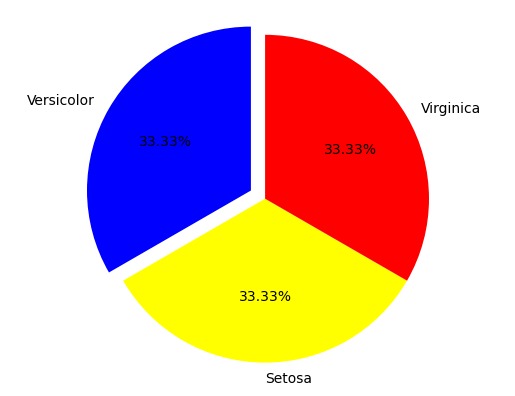

In [11]:
#plotting a piechart to visualize species
species = ['Versicolor', 'Setosa', 'Virginica']
sizes = [50, 50, 50]
colors = ['blue', 'yellow', 'red']
explode = (0.1, 0, 0) # Explode the first slice
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=species, colors=colors, autopct='%1.2f%%', startangle=90)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle

## **Scatter Plot**

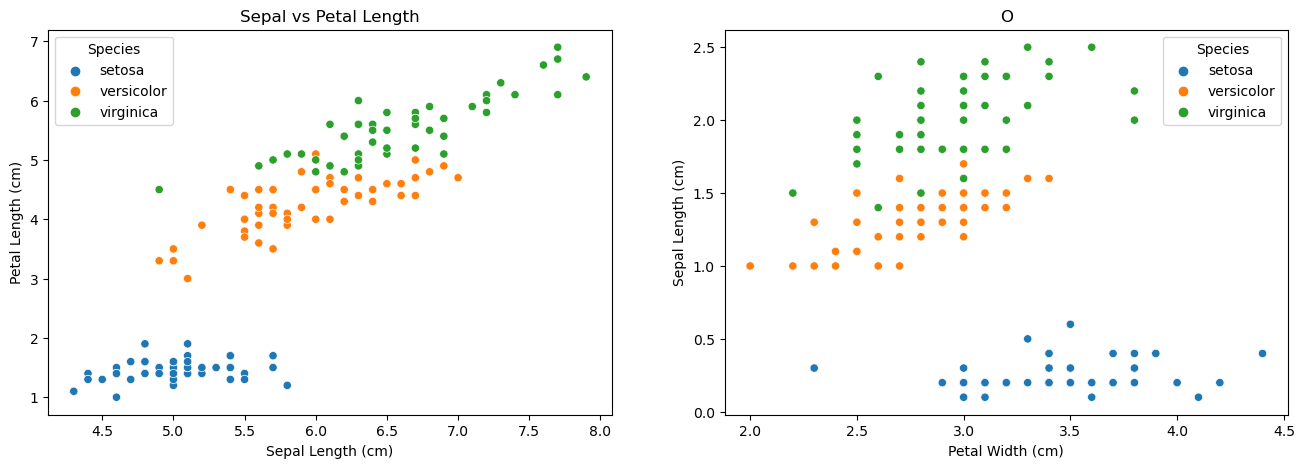

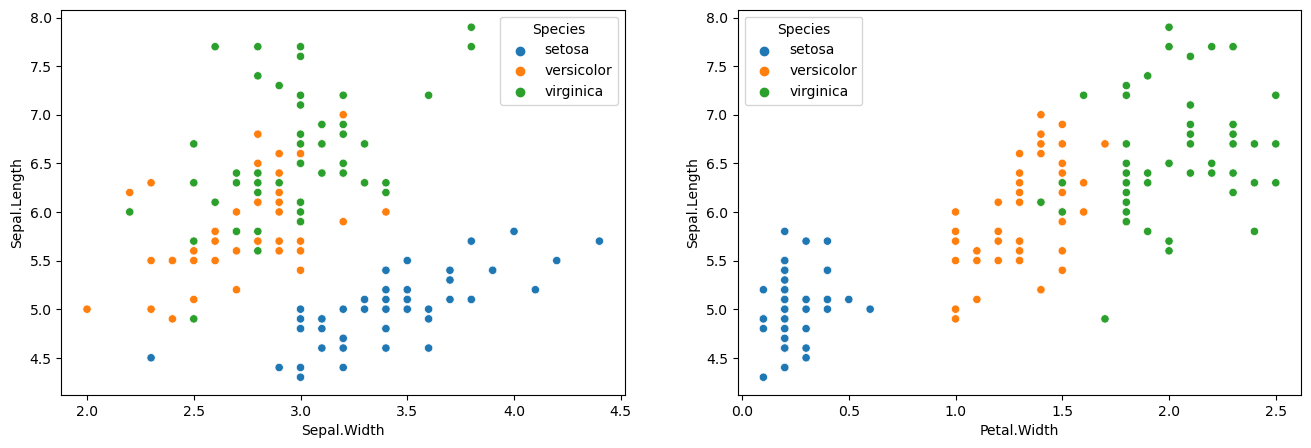

In [24]:
#Plotting an ordinary scatter plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Scatter plot 1
sns.scatterplot(x='Sepal.Length', y='Petal.Length', data=iris, hue='Species', ax=ax1)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_title('Sepal vs Petal Length')

# Scatter plot 2
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=iris, hue='Species', ax=ax2)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal vs Petal Width')

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(16, 5))

# Scatter plot 3
sns.scatterplot(x='Sepal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax3)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Sepal Length (cm)')
ax2.set_title('Sepal Width vs Petal Length')

# Scatter plot 4
sns.scatterplot(x='Petal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax4)
ax2.set_xlabel('Petal Width (cm)')
ax2.set_ylabel('Sepal Length (cm)')
ax2.set_title('O')

# Display the plot
plt.show()

## **Pairplot**

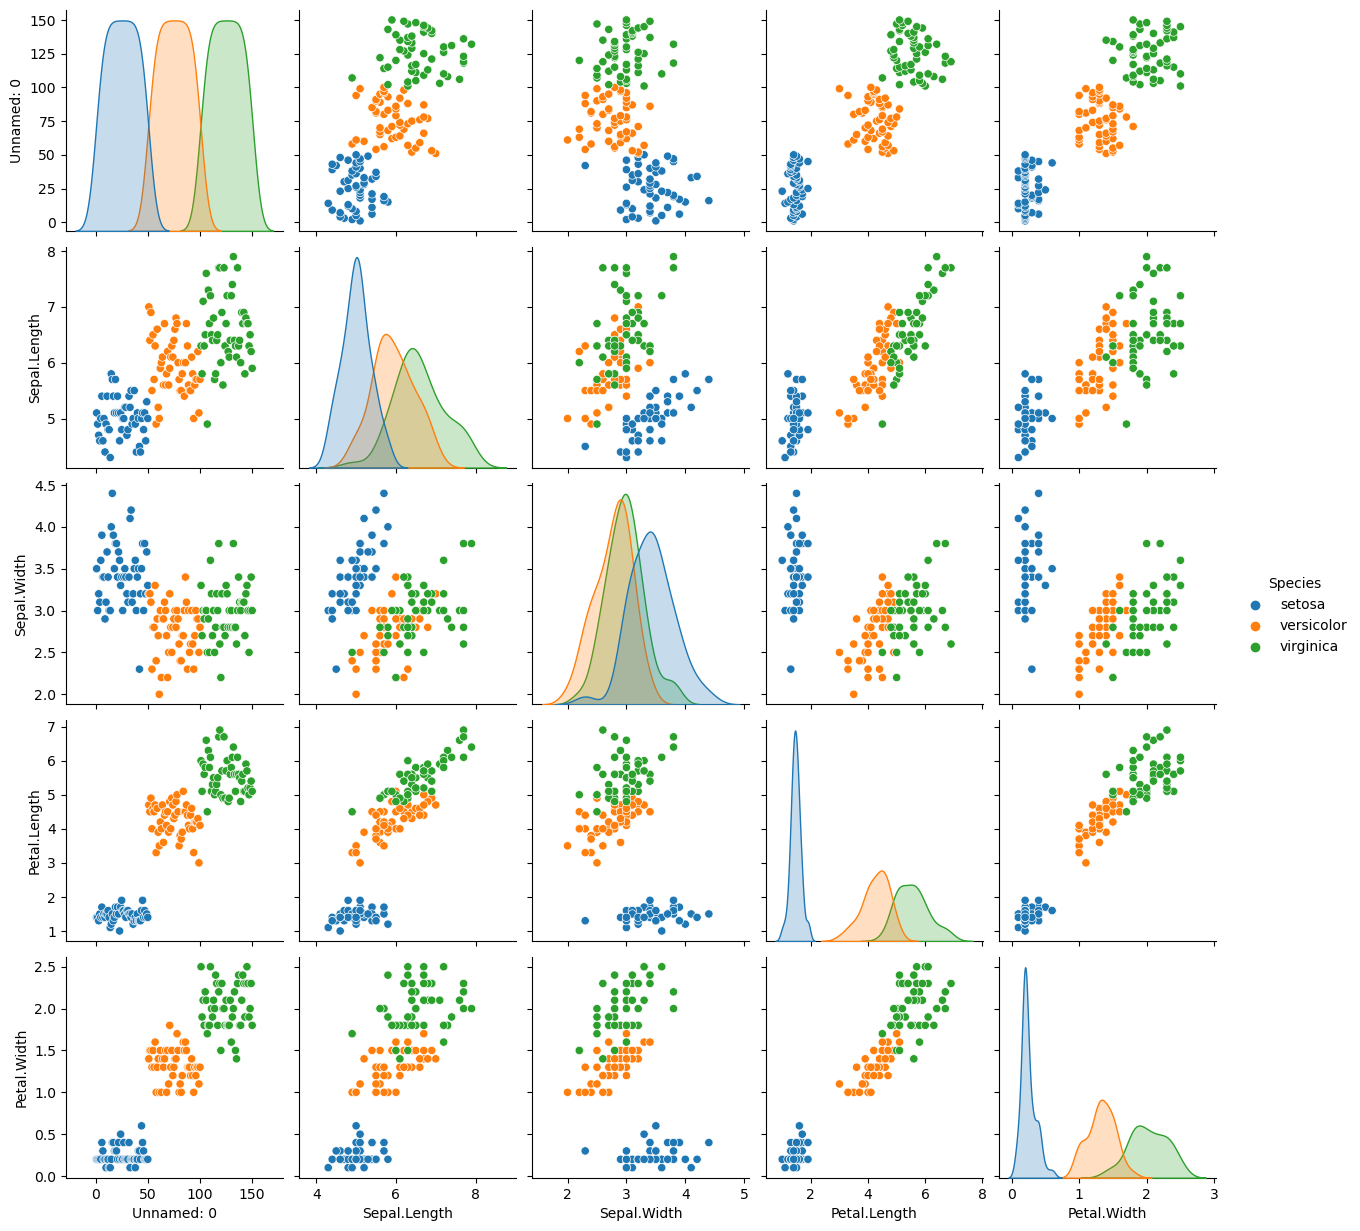

In [21]:
#plotting a seaborn pairplot
sns.pairplot(iris,hue='Species');

## **Line Plot**

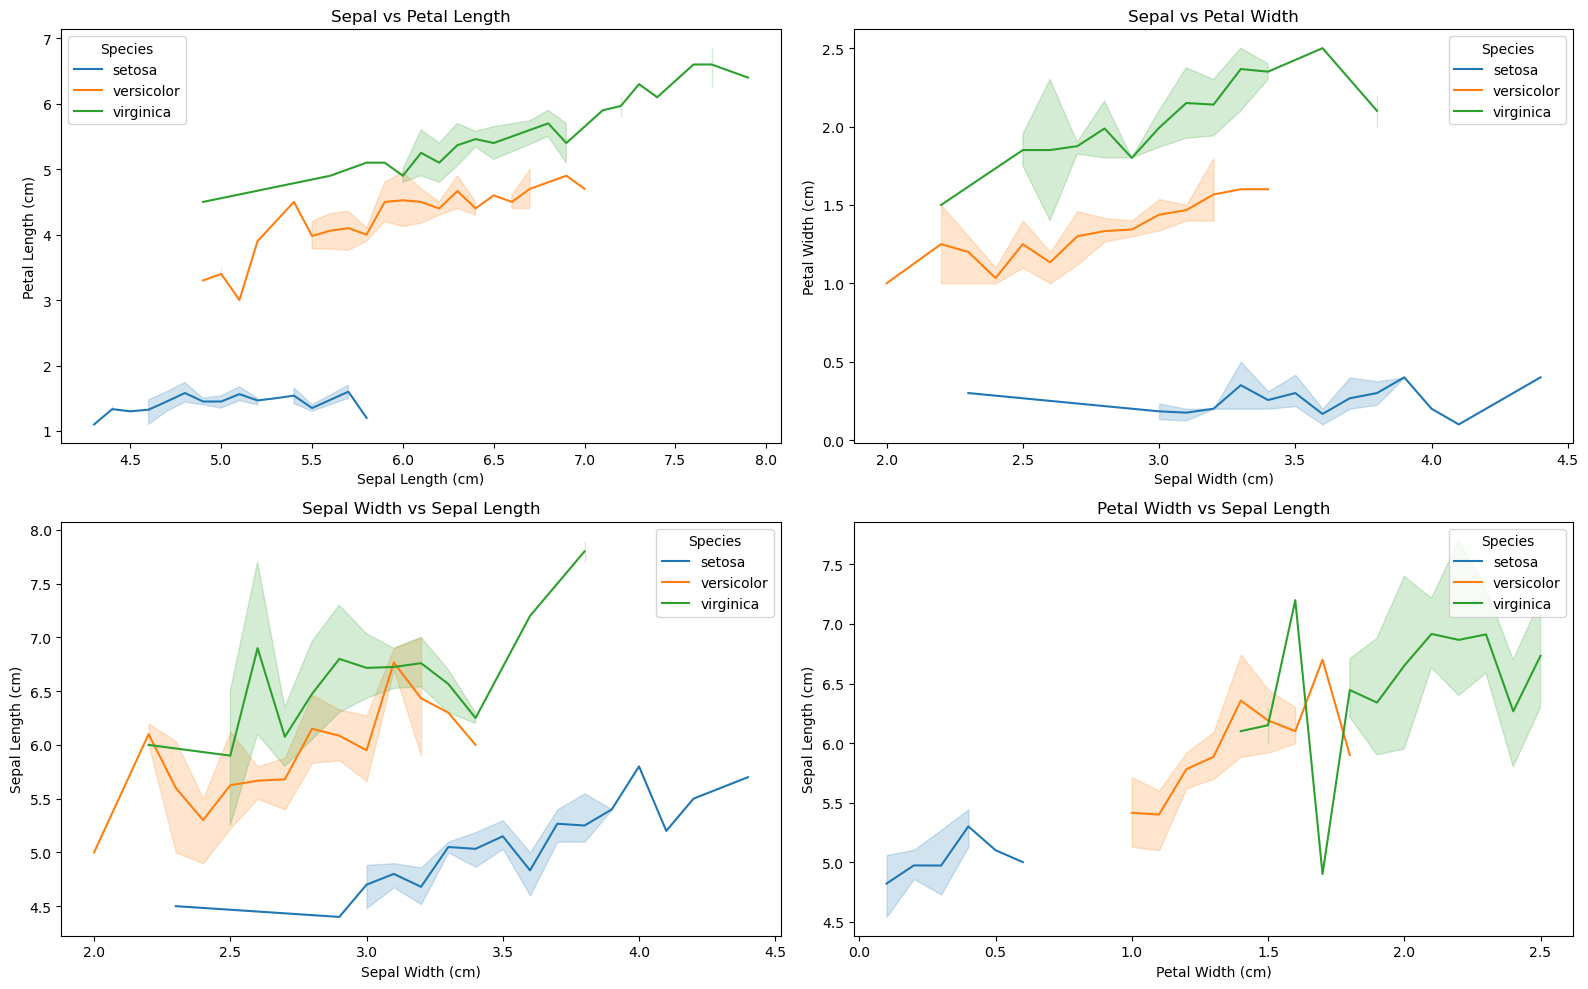

In [26]:
#Line PLot:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

#lineplot1:
sns.lineplot(x='Sepal.Length', y='Petal.Length', data=iris, hue='Species', ax=ax1)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_title('Sepal vs Petal Length')

#lineplot2:
sns.lineplot(x='Sepal.Width', y='Petal.Width', data=iris, hue='Species', ax=ax2)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal vs Petal Width')

#lineplot3:
sns.lineplot(x='Sepal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax3)
ax3.set_xlabel('Sepal Width (cm)')
ax3.set_ylabel('Sepal Length (cm)')
ax3.set_title('Sepal Width vs Sepal Length')

#lineplot4:
sns.lineplot(x='Petal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax4)
ax4.set_xlabel('Petal Width (cm)')
ax4.set_ylabel('Sepal Length (cm)')
ax4.set_title('Petal Width vs Sepal Length')

plt.tight_layout()

plt.show()

## **Bar Plot**

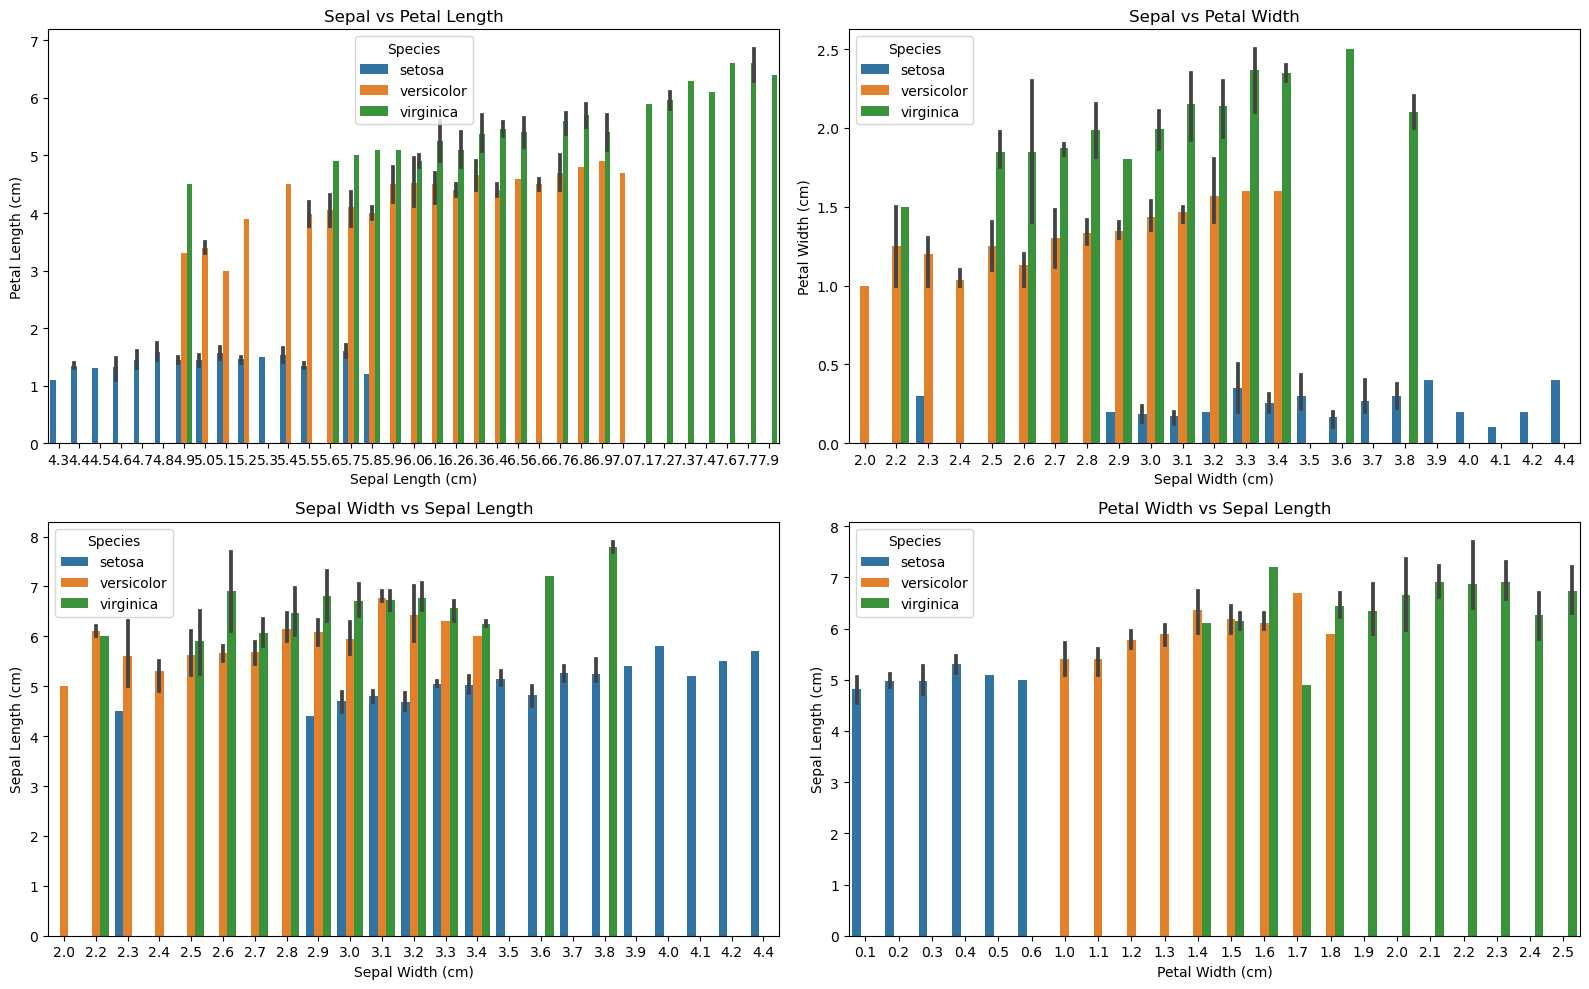

In [28]:
#Bar plot:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
#plot1
sns.barplot(x='Sepal.Length', y='Petal.Length', data=iris, hue='Species', ax=ax1)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_title('Sepal vs Petal Length')
#plot2
sns.barplot(x='Sepal.Width', y='Petal.Width', data=iris, hue='Species', ax=ax2)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Sepal vs Petal Width')
#plot3
sns.barplot(x='Sepal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax3)
ax3.set_xlabel('Sepal Width (cm)')
ax3.set_ylabel('Sepal Length (cm)')
ax3.set_title('Sepal Width vs Sepal Length')
#plot4
sns.barplot(x='Petal.Width', y='Sepal.Length', data=iris, hue='Species', ax=ax4)
ax4.set_xlabel('Petal Width (cm)')
ax4.set_ylabel('Sepal Length (cm)')
ax4.set_title('Petal Width vs Sepal Length')

plt.tight_layout()
plt.show()

## **Histogram**

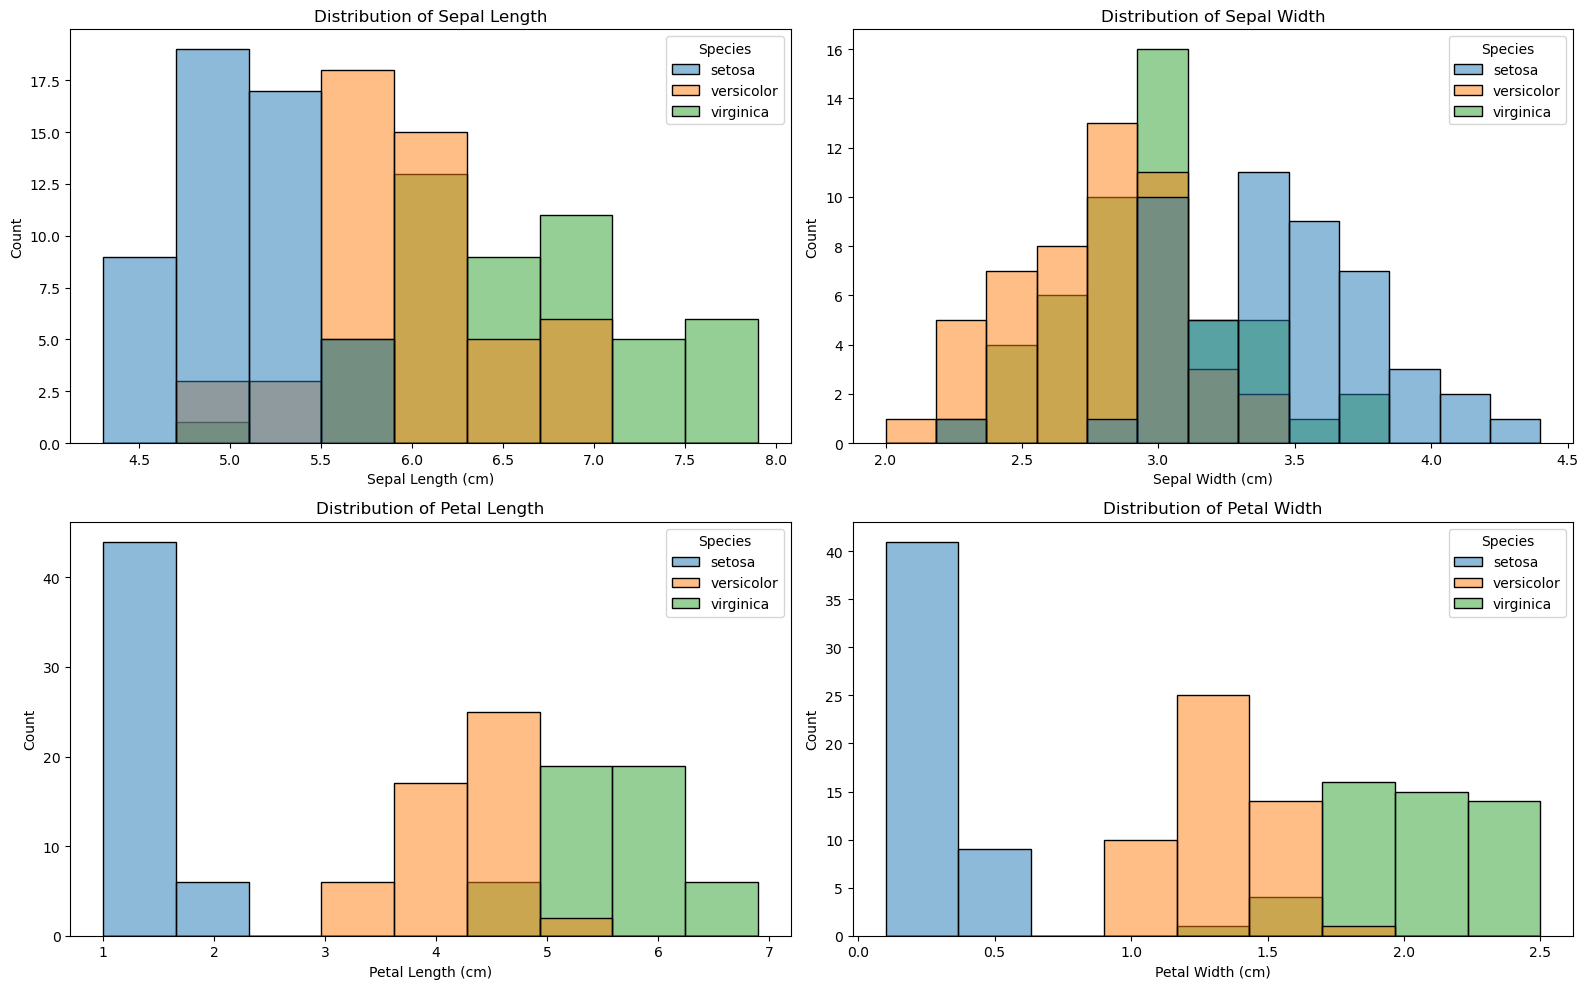

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

#histogram1
sns.histplot(data=iris, x='Sepal.Length', hue='Species', ax=ax1)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Sepal Length')
#histogram2
sns.histplot(data=iris, x='Sepal.Width', hue='Species', ax=ax2)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Sepal Width')
#histogram3
sns.histplot(data=iris, x='Petal.Length', hue='Species', ax=ax3)
ax3.set_xlabel('Petal Length (cm)')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Petal Length')
#histogram4
sns.histplot(data=iris, x='Petal.Width', hue='Species', ax=ax4)
ax4.set_xlabel('Petal Width (cm)')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of Petal Width')

plt.tight_layout()
plt.show()

## **Box Plot**

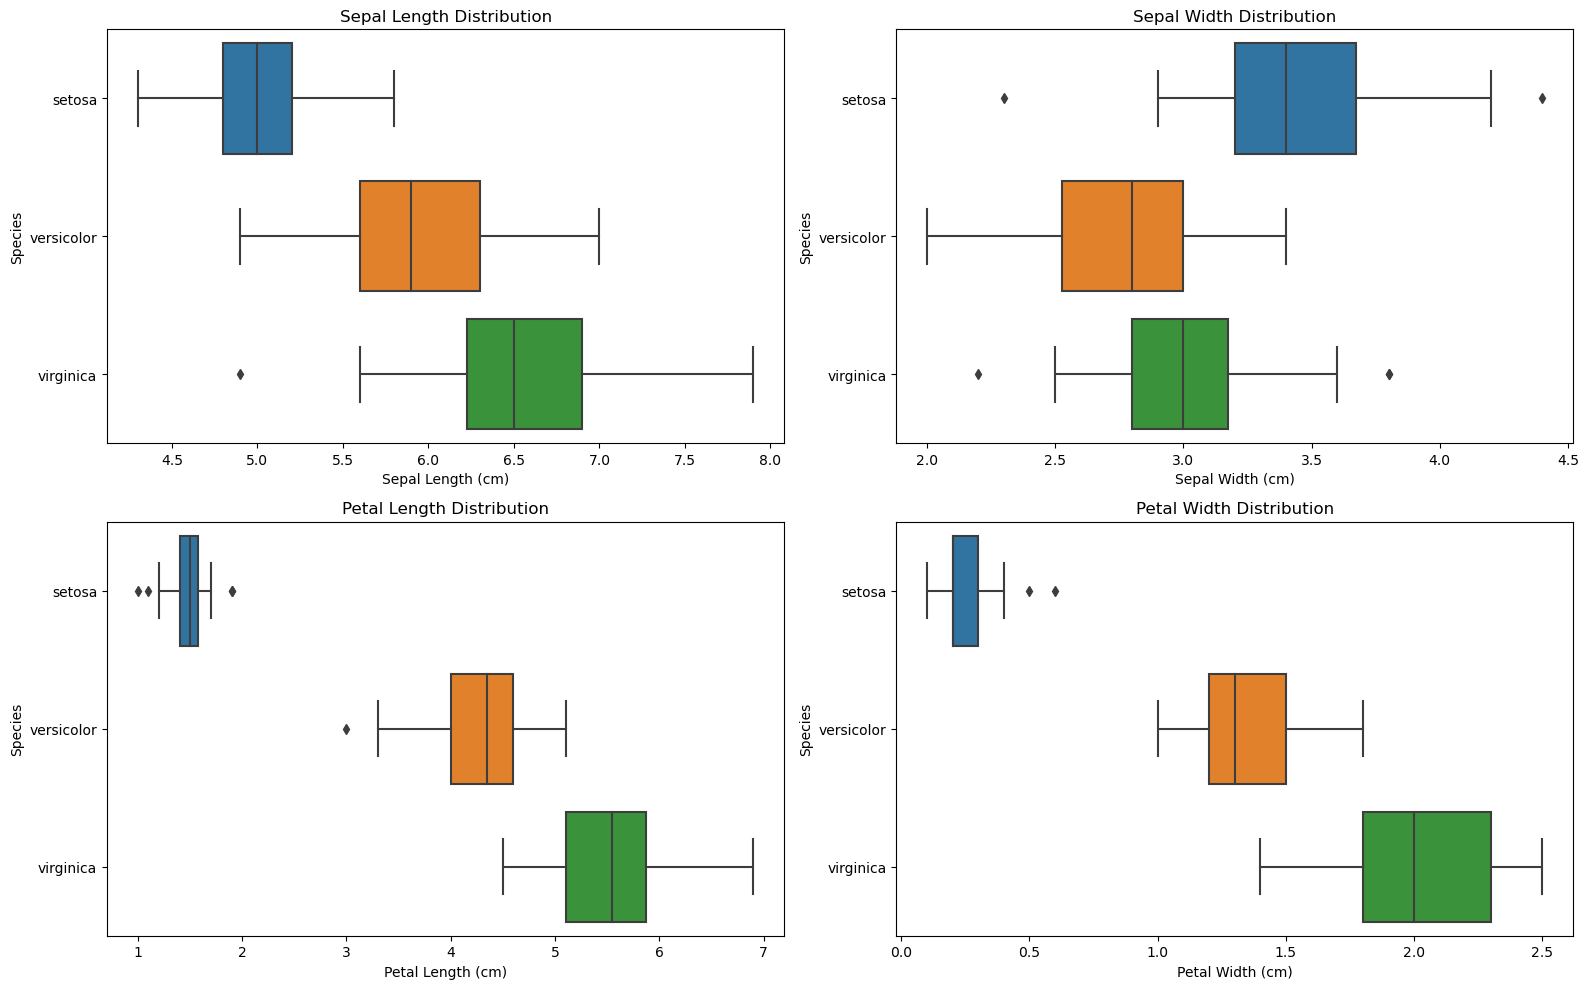

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

#plot1
sns.boxplot(data=iris, x='Sepal.Length', y='Species', ax=axs[0, 0])
axs[0, 0].set_xlabel('Sepal Length (cm)')
axs[0, 0].set_ylabel('Species')
axs[0, 0].set_title('Sepal Length Distribution')
#plot2
sns.boxplot(data=iris, x='Sepal.Width', y='Species', ax=axs[0, 1])
axs[0, 1].set_xlabel('Sepal Width (cm)')
axs[0, 1].set_ylabel('Species')
axs[0, 1].set_title('Sepal Width Distribution')
#plot3
sns.boxplot(data=iris, x='Petal.Length', y='Species', ax=axs[1, 0])
axs[1, 0].set_xlabel('Petal Length (cm)')
axs[1, 0].set_ylabel('Species')
axs[1, 0].set_title('Petal Length Distribution')
#plot4
sns.boxplot(data=iris, x='Petal.Width', y='Species', ax=axs[1, 1])
axs[1, 1].set_xlabel('Petal Width (cm)')
axs[1, 1].set_ylabel('Species')
axs[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

## **Violin Plot**

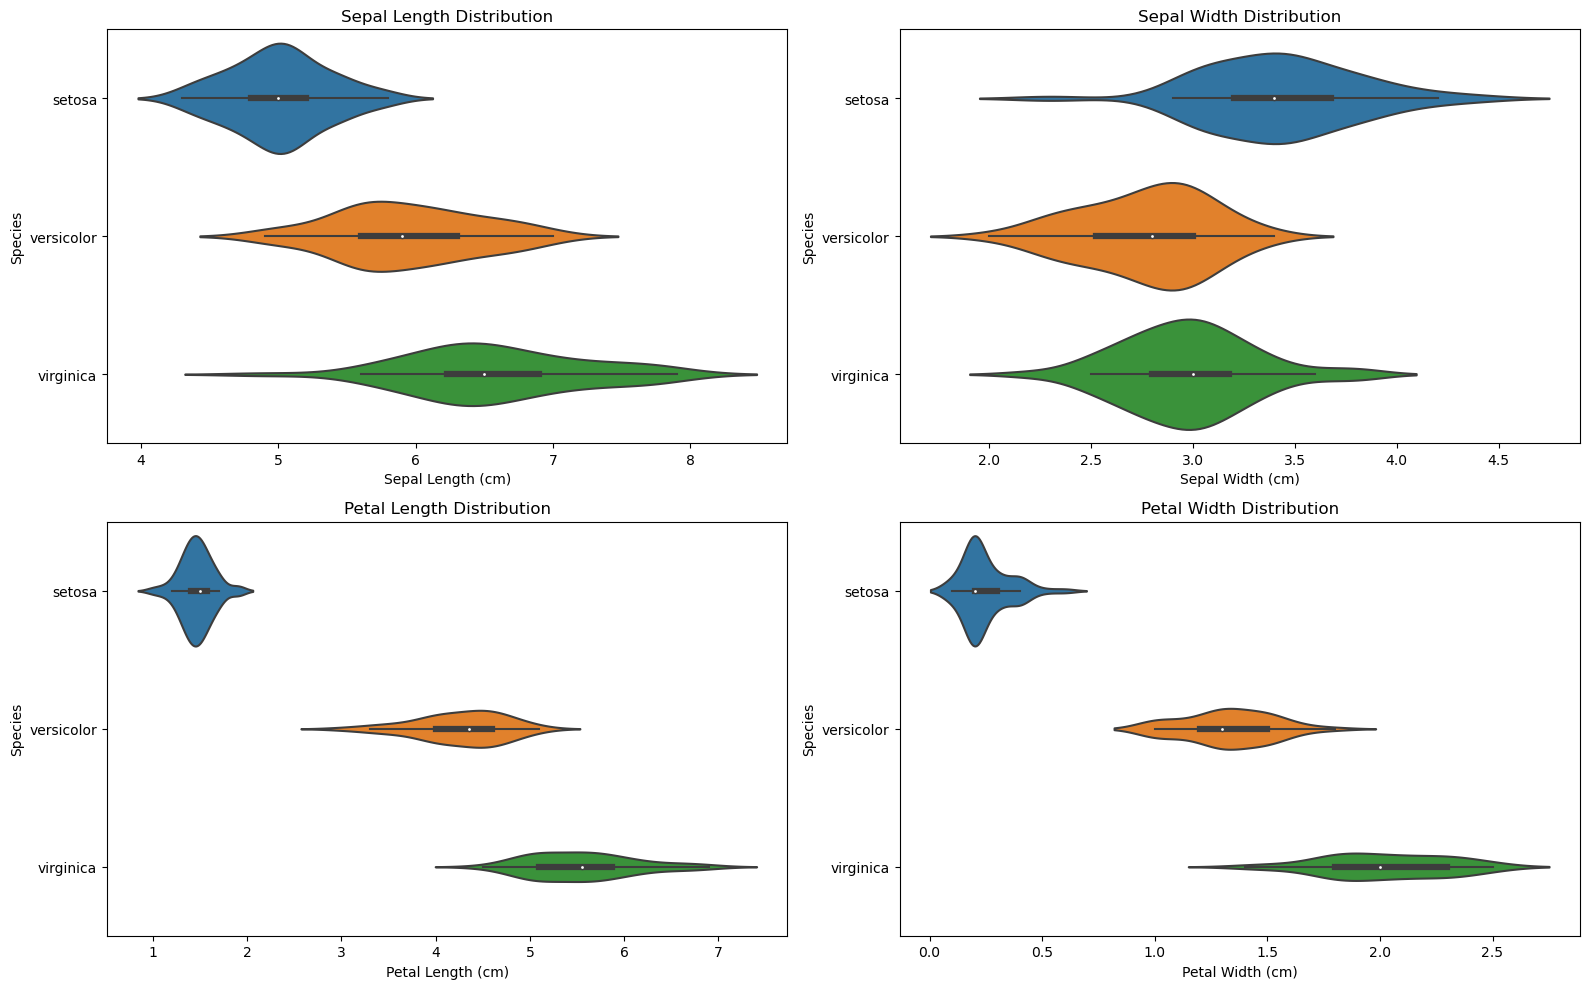

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

#plot1:
sns.violinplot(data=iris, x='Sepal.Length', y='Species', ax=axs[0, 0])
axs[0, 0].set_xlabel('Sepal Length (cm)')
axs[0, 0].set_ylabel('Species')
axs[0, 0].set_title('Sepal Length Distribution')
#plot2
sns.violinplot(data=iris, x='Sepal.Width', y='Species', ax=axs[0, 1])
axs[0, 1].set_xlabel('Sepal Width (cm)')
axs[0, 1].set_ylabel('Species')
axs[0, 1].set_title('Sepal Width Distribution')
#plot3
sns.violinplot(data=iris, x='Petal.Length', y='Species', ax=axs[1, 0])
axs[1, 0].set_xlabel('Petal Length (cm)')
axs[1, 0].set_ylabel('Species')
axs[1, 0].set_title('Petal Length Distribution')
#plot4
sns.violinplot(data=iris, x='Petal.Width', y='Species', ax=axs[1, 1])
axs[1, 1].set_xlabel('Petal Width (cm)')
axs[1, 1].set_ylabel('Species')
axs[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

## **Heatmap**

C:\Users\user\AppData\Local\Temp\ipykernel_72856\2932899692.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"})


<Figure size 640x480 with 0 Axes>

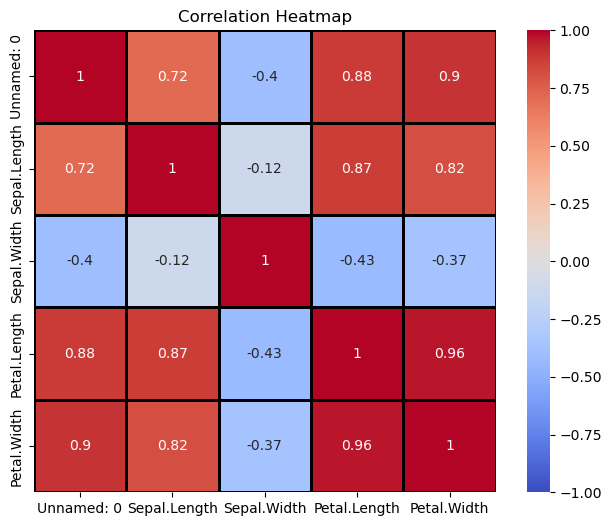

In [41]:
plt.gcf()
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"})
plt.title('Correlation Heatmap')
plt.show()

## **Joint Plot**

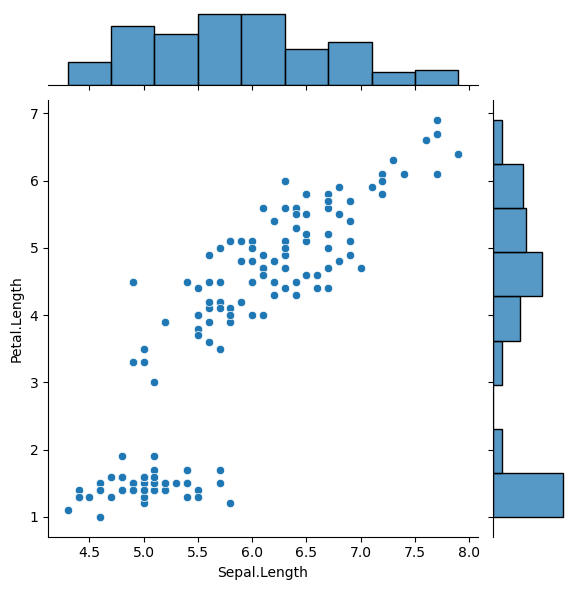

In [42]:
sns.jointplot(x='Sepal.Length', y='Petal.Length', data=iris, kind='scatter')
plt.show()

# **Testing and analyzing models**

In [85]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## **Training:**

In [54]:
train, test = train_test_split(iris, test_size = 0.35)
print(train.shape)
print(test.shape)

(97, 6)
(53, 6)


In [56]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
train_y = train['Species']

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
test_y = test['Species']

In [97]:
train_X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
49,5.0,3.3,1.4,0.2
19,5.1,3.8,1.5,0.3
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
137,6.4,3.1,5.5,1.8


In [94]:
train_y.head()

49        setosa
19        setosa
25        setosa
13        setosa
137    virginica
Name: Species, dtype: object

In [95]:
test_X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
109,7.2,3.6,6.1,2.5
52,6.9,3.1,4.9,1.5
29,4.7,3.2,1.6,0.2
134,6.1,2.6,5.6,1.4
37,4.9,3.6,1.4,0.1


In [96]:
test_y.head()

109     virginica
52     versicolor
29         setosa
134     virginica
37         setosa
Name: Species, dtype: object

## **Logistic Regression**

In [100]:
model = LogisticRegression()
model.fit(train_X, train_y)
pred = model.predict(test_X)

accuracy = accuracy_score(test_y, pred)
precision = precision_score(test_y, pred, average='weighted')
recall = recall_score(test_y, pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification report:\n", classification_report(test_y, pred))

Accuracy Score: 0.9245283018867925
Precision: 0.9245283018867925
Recall: 0.9245283018867925

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.92      0.92      0.92        53



D:\Downloads\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Confusion Matrix**

In [108]:
confusion_mat = confusion_matrix(test_y, prediction)
print("Confusion matrix:\n", confusion_mat)
print("\nClassification report:\n", classification_report(test_y, prediction))

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion matrix:
 [[17  0  0]
 [ 0 16  2]
 [ 0  2 16]]

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.92      0.92      0.92        53

Accuracy Score: 0.9245283018867925
Precision: 0.9278301886792453
Recall: 0.9245283018867925


## **Gaussian Naive Bayes**

In [106]:
model3 = GaussianNB()
model3.fit(train_X, train_y)
y_pred3 = model3.predict(test_X)


accuracy = accuracy_score(test_y, y_pred3)
precision = precision_score(test_y, y_pred3, average='weighted')
recall = recall_score(test_y, y_pred3, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification report:\n", classification_report(test_y, prediction))

Accuracy Score: 0.9245283018867925
Precision: 0.9278301886792453
Recall: 0.9245283018867925

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.92      0.92      0.92        53



## **K-Nearest Neighbors**

In [101]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X, train_y)
y_pred2 = model2.predict(test_X)


accuracy = accuracy_score(test_y, y_pred2)
precision = precision_score(test_y, y_pred2, average='weighted')
recall = recall_score(test_y, y_pred2, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification report:\n", classification_report(test_y, prediction))

Accuracy Score: 0.9433962264150944
Precision: 0.9442724458204335
Recall: 0.9433962264150944

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.92      0.92      0.92        53



## **Decision Tree**

In [104]:
model4 = DecisionTreeClassifier()
model4.fit(train_X, train_y)
y_pred4 = model4.predict(test_X)

accuracy = accuracy_score(test_y, y_pred4)
precision = precision_score(test_y, y_pred4, average='weighted')
recall = recall_score(test_y, y_pred4, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification report:\n", classification_report(test_y, y_pred3))

Accuracy Score: 0.9245283018867925
Precision: 0.9245283018867925
Recall: 0.9245283018867925

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.85      0.94      0.89        18
   virginica       0.94      0.83      0.88        18

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.93      0.92      0.92        53



In [113]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Gaussian Naive Bayes', 'K Nearest Neighbors', 'Decision Tree'],
    'Score': [0.25, 0.925, 0.925, 0.944, 0.921],
    'Precision': [0.925, 0.928, 0.928, 0.944, 0.925], 
    'Recall': [0.925, 0.925, 0.925, 0.943, 0.925]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Precision,Recall
Score,,,
0.944,K Nearest Neighbors,0.944,0.943
0.925,Support Vector Machines,0.928,0.925
0.925,Gaussian Naive Bayes,0.928,0.925
0.921,Decision Tree,0.925,0.925
0.250,Logistic Regression,0.925,0.925


### **As K nearest neighbors has the highest precision, accuracy and recall score, it is the best model**